
{{% alert warning %}}It is recommended to read the tutorial on [using pyDSA on a single image](../pydsa/index.html) before doing this tutorial.{{% /alert %}}

This tutorial presents how to use pyDSA to analyze videos of drops. 
The video used is a side-view of a drop during an inflation-deflation sequence.

## Importing a video

Importing works in the same way than for an image.


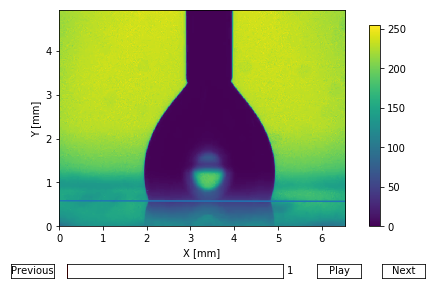

In [1]:
import pyDSA as dsa   
import matplotlib.pyplot as plt

# Import an image
ims = dsa.import_from_video('data/video.mp4',
                            dx=1/120, dy=1/120, dt=1/10,
                            unit_x='mm', unit_y='mm', unit_t='s',
                            incr=10)
# Display
ims.display()
plt.show()

## Scaling
As for an image, you can specify the scaling during the import (as it is done here), or by
using the interactive function `ims.scale_interactive()`.

## Detecting the edges and contact angles

The method is similar than for a single image: we set the baseline, detect the edges, fit the edges, and compute the contact angles.

As presented in the [pyDSA image tutorial](../pydsa/index.html), different type of fittings are available:
- Spline
- Circle
- Ellipse
- Multiple circles

We will be using the spline fitting here:

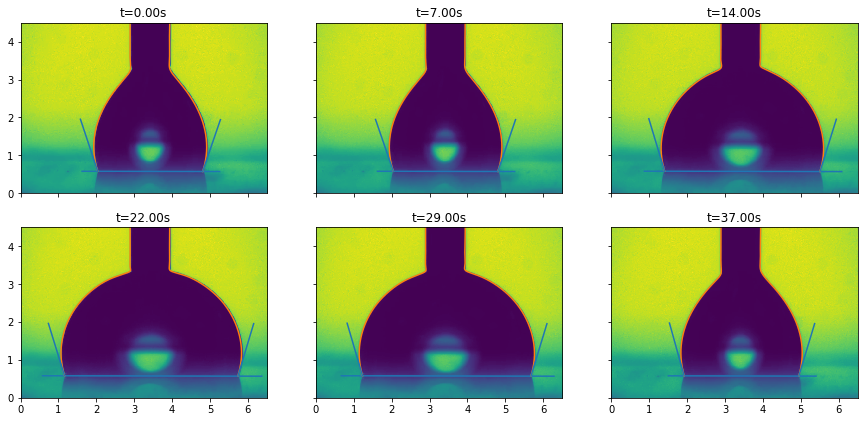

In [2]:
ims.set_baseline([0.0, 0.583],
                 [6.492, 0.57])
edges = ims.edge_detection()
fits = edges.fit_spline(s=0.01)
fits.compute_contact_angle()

# Display
fig, axs = plt.subplots(2, 3, figsize=(15, 6.9), sharex=True, sharey=True)
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    ind = int(i/5*(len(ims) - 1))
    ims[ind]._display()
    fits[ind].display()
    plt.xlabel('')
    plt.ylabel('')
    plt.title('t={:.2f}s'.format(ims.times[ind]))
plt.xlim(0, 6.5)
plt.ylim(0, 4.5)
plt.show()

## Plotting the drop properties evolution

We can then display a summary of the drop properties evolution.
The following function will display:
- the evolution of the drop edge contact with the surface (blue and yellow in the first figure)
- the evolution of the drop base length (green in the first figure)
- the evolution of the contact angles (blue and yellow in the second figure)

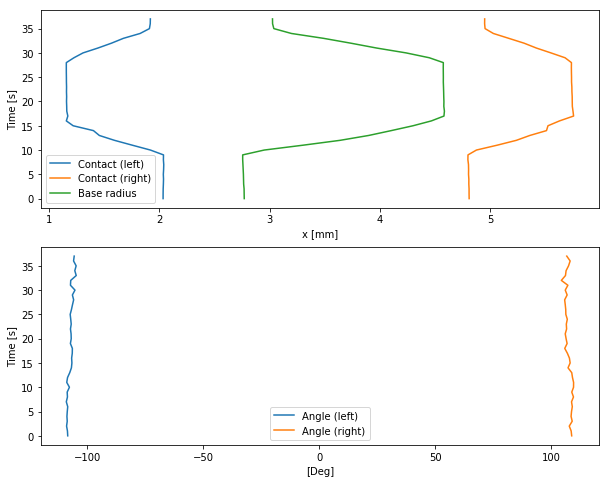

In [4]:
fits.display_summary(figsize=(10, 8))
plt.show()

## Accessing the drop properties

We can also extract the numeric values of those properties, 
if we want to do further processing on them.

{{% alert info %}}Angles are defined in the trigonometric sens, from the horizontal line.{{% /alert %}}

In [8]:
thetas = fits.get_contact_angles()
print("=== Left contact angle: ===")
print(thetas[:, 0])
print("\n=== Right contact angle: ===")
print(thetas[:, 1])

radius = fits.get_base_diameter()
print("\n=== Drop base diameter: ===")
print(radius)

=== Left contact angle: ===
[108.45133251 108.56905333 108.94098414 108.6637685  108.78968229
 108.64729511 108.45042889 109.05726449 108.56891952 108.68291827
 107.71614238 108.8673281  108.52842827 107.57748007 106.85612559
 106.64619826 106.7598668  106.48821283 106.44766937 107.2928261
 106.93754907 107.0023547  107.26599542 106.94606549 107.15156984
 107.38603405 106.84095892 106.38816455 105.89933937 106.43425898
 105.32280892 107.26613371 107.15417786 104.78656759 105.39636683
 104.82098104 105.93024436 105.65709515]

=== Right contact angle: ===
[71.18519713 71.41361539 72.23069913 70.96384133 71.44834136 71.2539393
 70.9257835  71.24947839 70.41384888 71.14552044 70.38516186 70.36636714
 70.83824699 71.16268663 72.76688233 71.8499163  72.16335096 73.04331667
 74.1749071  73.16412427 73.59414798 73.96603928 73.3791147  73.5018931
 73.07770852 73.70699554 73.74711474 73.96098094 74.21544043 73.14658736
 73.95969063 72.83238649 75.64029916 73.86062653 73.5998559  72.53706922
 71.